# Metrics Visualization for Different Epsilon Values

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis_util import load_and_extract_metrics

In [10]:
# Set Seaborn style and context
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## Data Preparation

In [11]:
paths = {
    0.1: 'SimulationOutputs/Quantitative/epsilon_0.1_clipping_norm_inf/metrics.json',
    0.5: 'SimulationOutputs/Quantitative/epsilon_0.5_clipping_norm_inf/metrics.json',
    1.0: 'SimulationOutputs/Quantitative/epsilon_1.0_clipping_norm_inf/metrics.json',
    2.0: 'SimulationOutputs/Quantitative/epsilon_2.0_clipping_norm_inf/metrics.json',
    5.0: 'SimulationOutputs/Quantitative/epsilon_5.0_clipping_norm_inf/metrics.json',
    10.0: 'SimulationOutputs/Quantitative/epsilon_10.0_clipping_norm_inf/metrics.json'
}

In [12]:
# Load metrics for each epsilon value
epsilon_metrics = {}
for epsilon, path in paths.items():
    epsilon_metrics[epsilon] = load_and_extract_metrics(path)

In [13]:
# Prepare data for plotting
def prepare_metrics_dataframe(epsilon_metrics, metric_type):
    data = []
    for epsilon, metrics in epsilon_metrics.items():
        for round_num, accuracy in enumerate(metrics[metric_type]):
            data.append({
                'Epsilon': epsilon,
                'Round': round_num,
                'Accuracy': accuracy
            })
    return pd.DataFrame(data)

In [14]:
server_df = prepare_metrics_dataframe(epsilon_metrics, 'server_metrics')
client_df = prepare_metrics_dataframe(epsilon_metrics, 'aggregated_metrics')

client_df['Round'] = client_df['Round'] + 1 # Shift rounds by 1

best_metrics = {
    'Epsilon': list(epsilon_metrics.keys()),
    'Server Best Metrics': [metrics['best_server_metric'] for metrics in epsilon_metrics.values()],
    'Aggregated Best Metrics': [metrics['best_aggregated_metric'] for metrics in epsilon_metrics.values()]
}

best_metrics_df = pd.DataFrame(best_metrics)

## First Visualization: Accuracy per Round Comparison

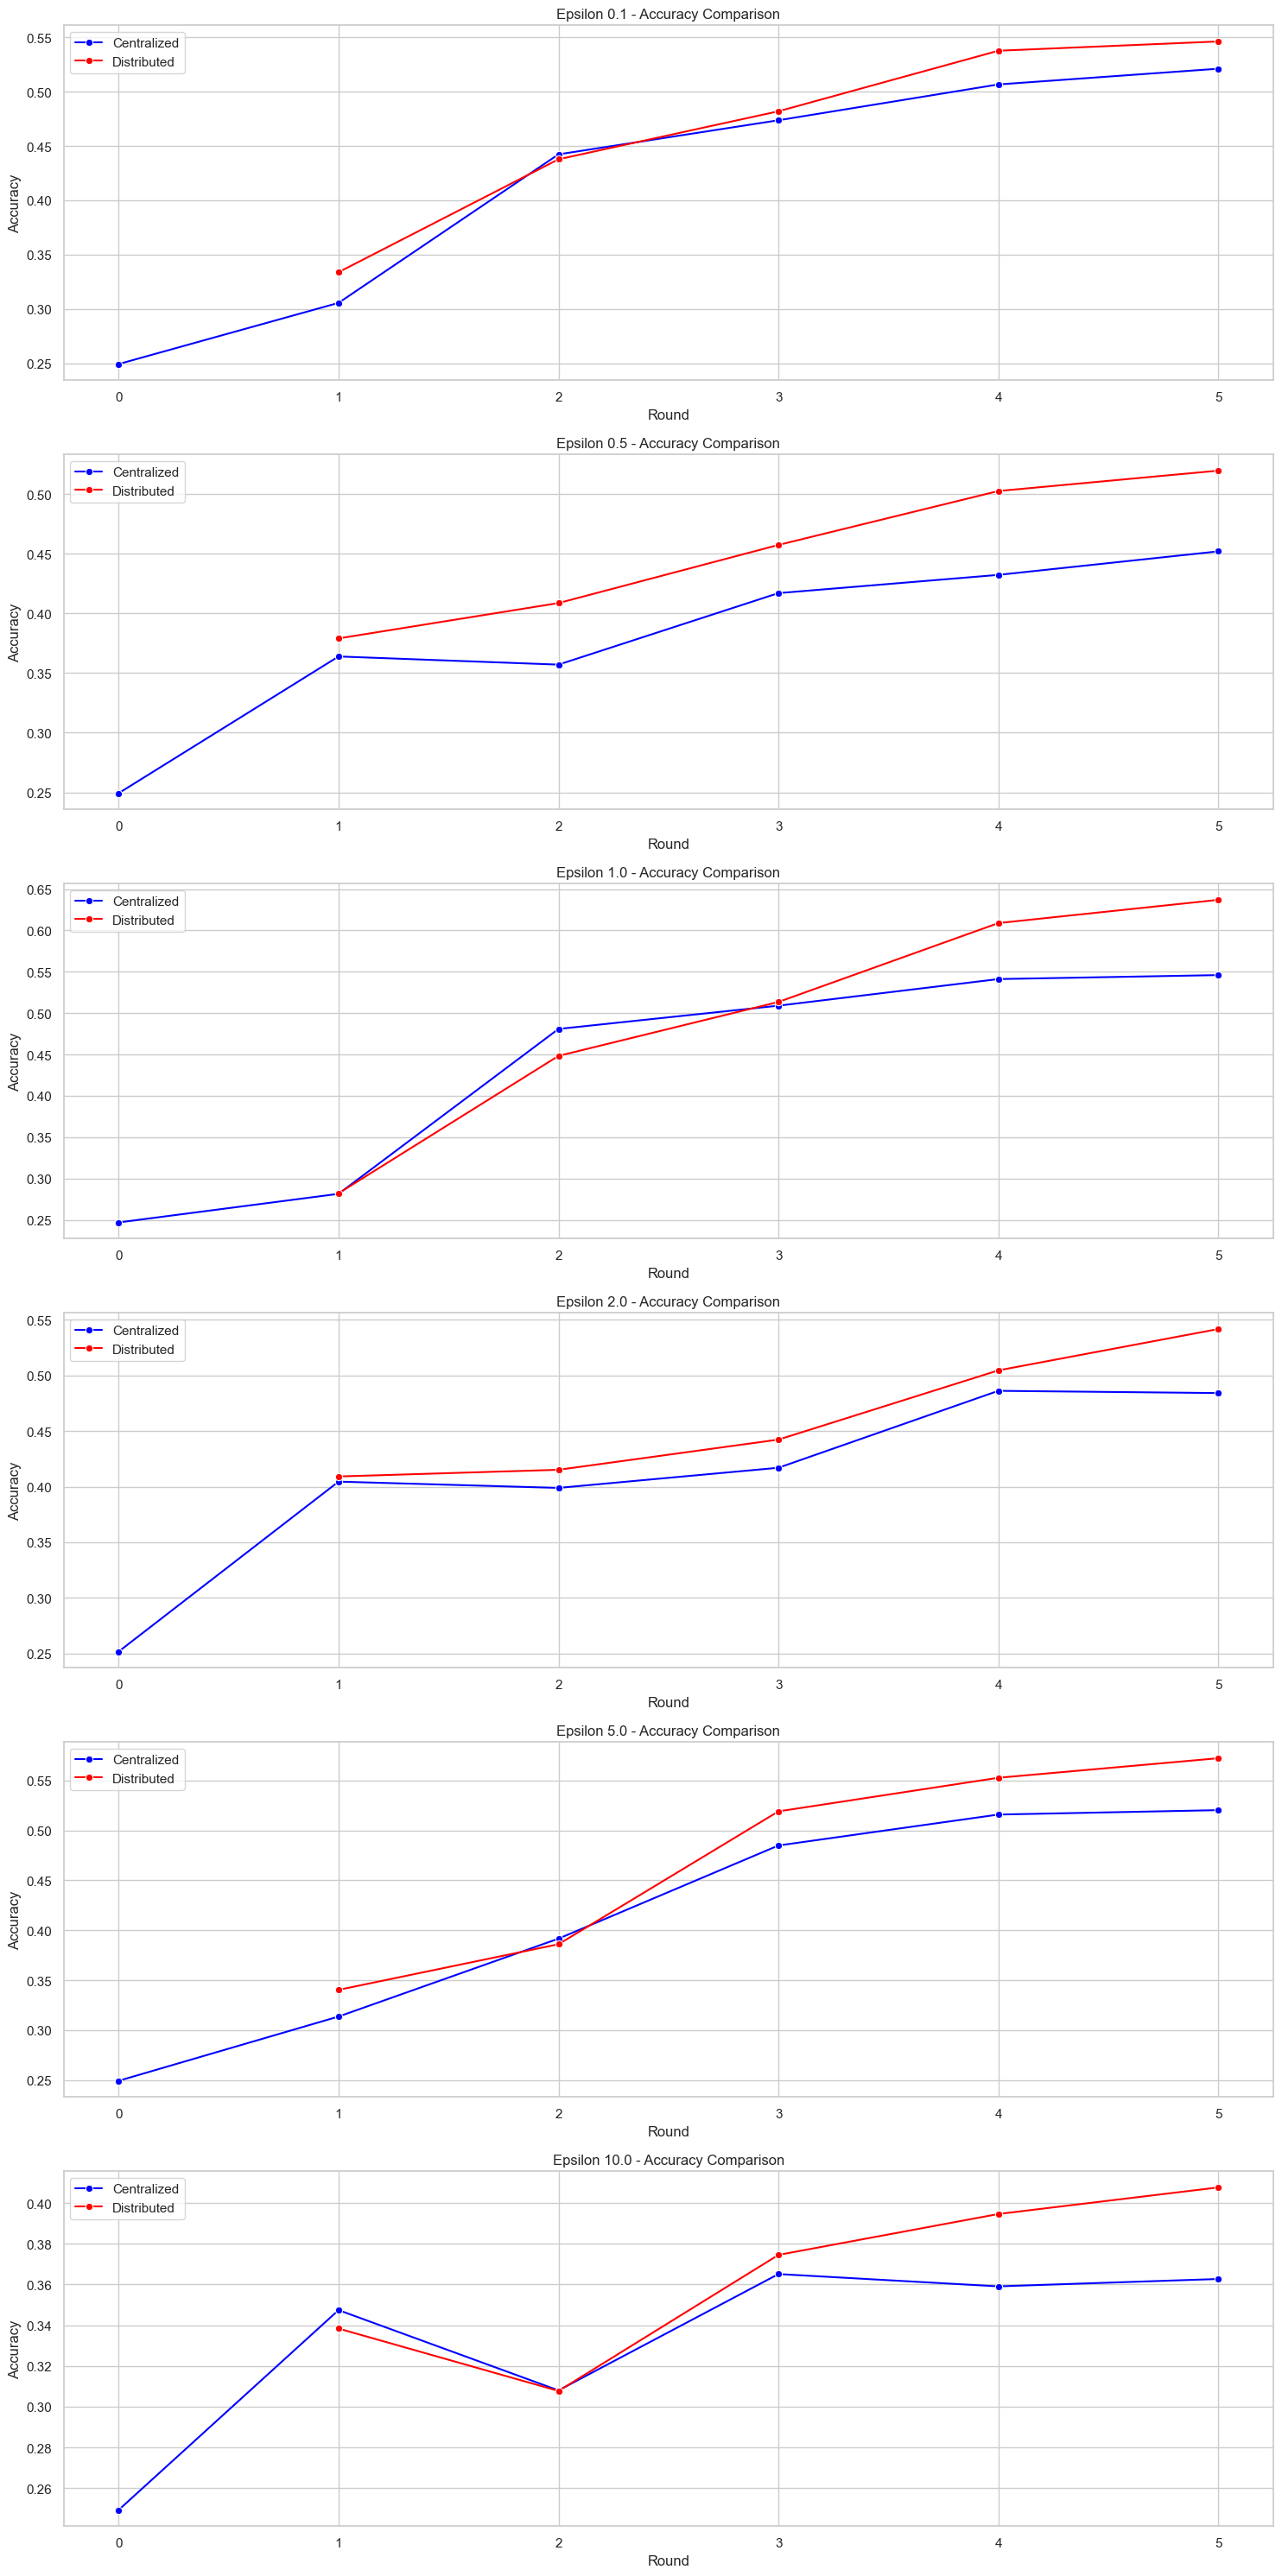

In [15]:
plt.figure(figsize=(15, 30))

for j, epsilon in enumerate(sorted(epsilon_metrics.keys())):
    plt.subplot(6, 1, j + 1)
    
    # Plot centralized accuracy
    centralized_subset = server_df[server_df['Epsilon'] == epsilon]
    sns.lineplot(data=centralized_subset, x='Round', y='Accuracy', 
                marker='o', color='blue', label='Centralized')
    
    # Plot distributed accuracy
    distributed_subset = client_df[client_df['Epsilon'] == epsilon]
    sns.lineplot(data=distributed_subset, x='Round', y='Accuracy', 
                marker='o', color='red', label='Distributed')
    
    plt.title(f'Epsilon {epsilon} - Accuracy Comparison')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

## Best Metrics as Function of Epsilon

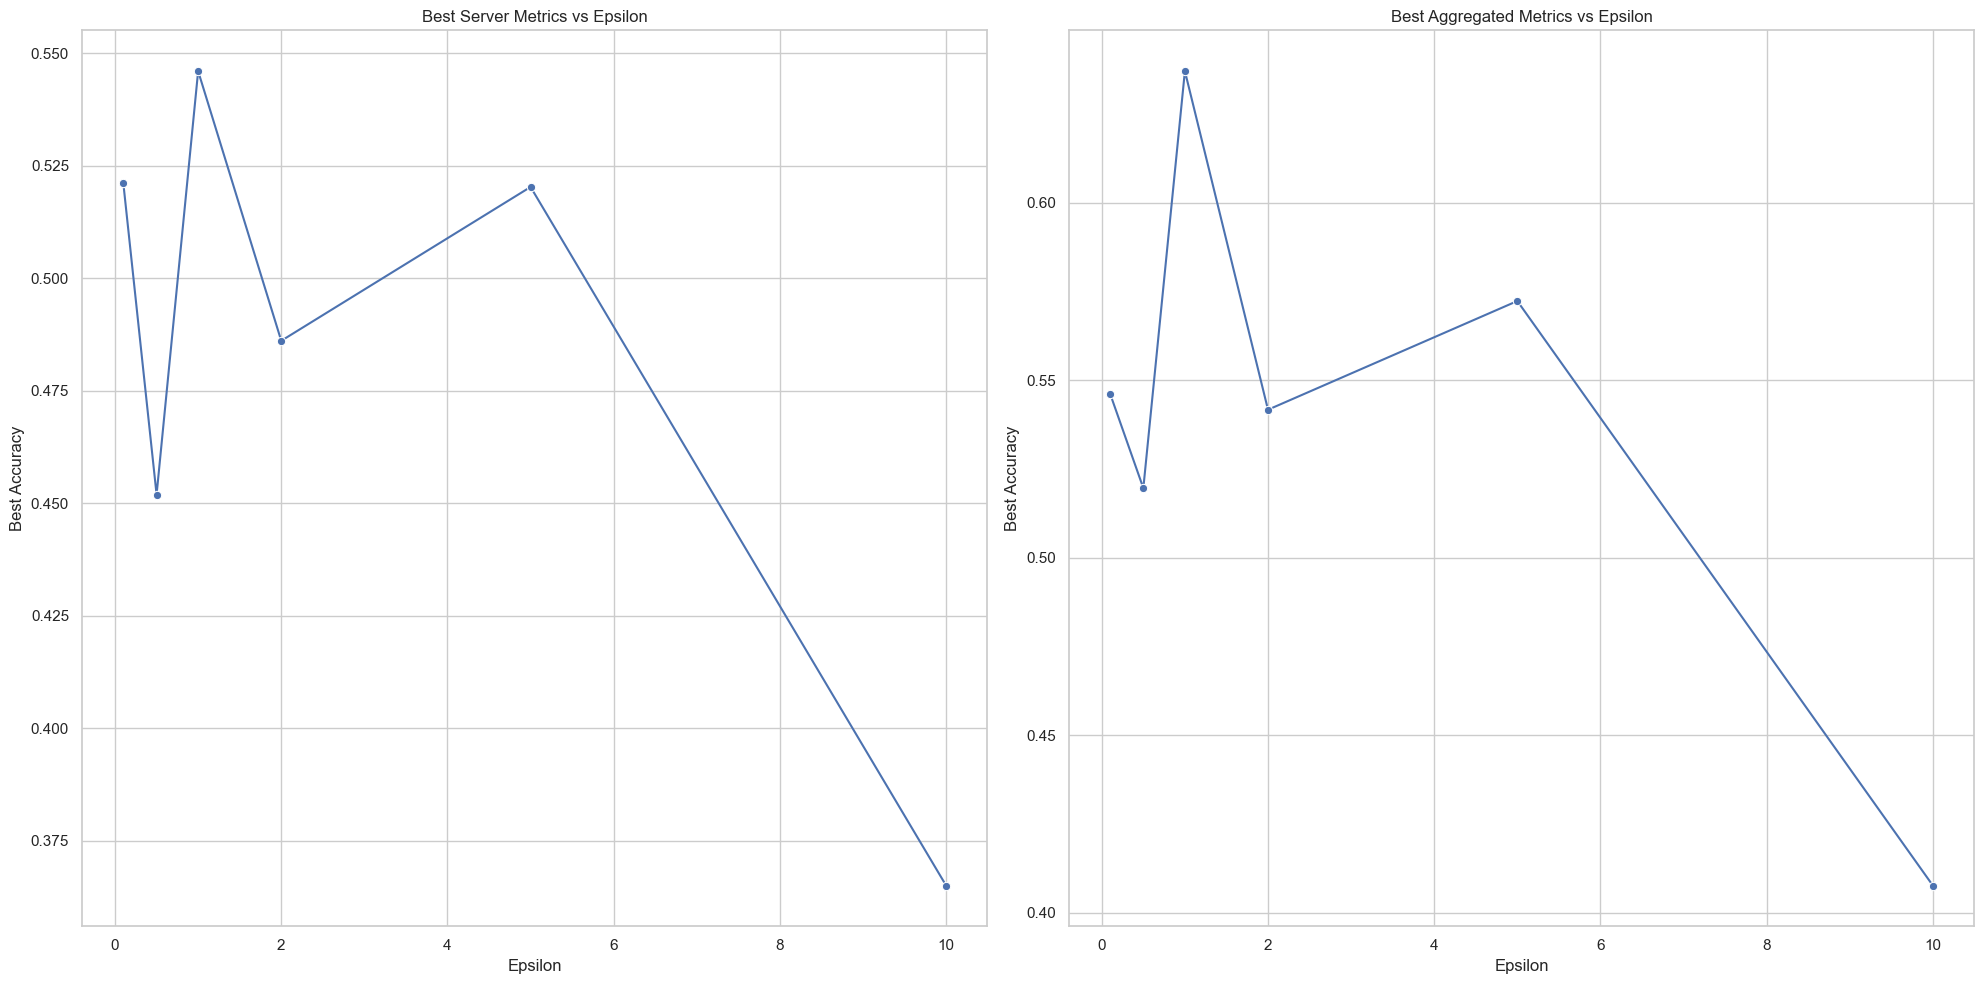

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.lineplot(data=best_metrics_df, x='Epsilon', y='Server Best Metrics', marker='o')
plt.title('Best Server Metrics vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Best Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=best_metrics_df, x='Epsilon', y='Aggregated Best Metrics', marker='o')
plt.title('Best Aggregated Metrics vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Best Accuracy')

plt.tight_layout()
plt.show()